In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
df1 = pd.read_csv('customer_data.csv')
df2 = pd.read_csv('weather_data.csv')

In [3]:
#Convert StringDate to Date datatype
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])
df = pd.merge(df1,df2,how='inner',on=['date'])

In [4]:
#Create new column for weekday by mapping lambda function to converted date datatype, each weekday was assigned a value 

df["weekday"] = df['date'].map(lambda x: x.weekday())


In [5]:
#Create new column for month by mapping lambda function to converted date datatype, each month was assigned a value 
df["month"] = df['date'].map(lambda x: x.month)

In [6]:
#Add month colum by mapping to date, values assigned from 1 - 12
#More data provided = more precision or accuracy in linear regression model/trend line
#Month and Weekday values are to form Monrth and weekday 

#Binary, Weekday = 1 if it is that day, Weekday = 0 if it is not that day
df["Monday"] = df["weekday"].map(lambda x: True if x==0 else False )
df["Tuesday"] = df["weekday"].map(lambda x: True if x==1 else False )
df["Wednesday"] = df["weekday"].map(lambda x: True if x==2 else False )
df["Thursday"] = df["weekday"].map(lambda x: True if x==3 else False )
df["Friday"] = df["weekday"].map(lambda x: True if x==4 else False )
df["Saturday"] = df["weekday"].map(lambda x: True if x==5 else False )
df["Sunday"] = df["weekday"].map(lambda x: True if x==6 else False )

#Binary, month = 1 if it is that month, month = 0 if it is not that month
df["Jan"] = df["month"].map(lambda x: True if x==1 else False )
df["Feb"] = df["month"].map(lambda x: True if x==2 else False )
df["Mar"] = df["month"].map(lambda x: True if x==3 else False )
df["Apr"] = df["month"].map(lambda x: True if x==4 else False )
df["May"] = df["month"].map(lambda x: True if x==5 else False)
df["Jun"] = df["month"].map(lambda x: True if x==6 else False )
df["Jul"] = df["month"].map(lambda x: True if x==7 else False )
df["Aug"] = df["month"].map(lambda x: True if x==8 else False )
df["Sep"] = df["month"].map(lambda x: True if x==9 else False )
df["Oct"] = df["month"].map(lambda x: True if x==10 else False )
df["Nov"] = df["month"].map(lambda x: True if x==11 else False )
df["Dec"] = df["month"].map(lambda x: True if x==12 else False )


In [7]:
#Adding df as iterative design cycle process
df

,date,customers,precipitation,temperature,weekday,month,Monday,Tuesday,Wednesday,Thursday,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2017-01-01,0,0,44,6,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2017-01-02,18,7,42,0,1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2017-01-03,13,8,46,1,1,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2017-01-04,13,48,47,2,1,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2017-01-05,32,20,40,3,1,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5,2017-01-06,45,0,37,4,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2017-01-07,45,19,48,5,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,2017-01-08,22,35,55,6,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2017-01-09,0,89,49,0,1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,2017-01-10,19,30,51,1,1,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#Since Monday is closed, Monday data not required, hence removing Monday data: in order to remove monday>0 dates
#Remove Mondya rows and then Monday Colums because I am Using Monday colum to remove rows
#Assign Monday colum 0 values 
df = df[df["Monday"]==0]

In [9]:
#removing Monday, weeday and month columns as we do not need them anymore
df.drop(['Monday', 'weekday', 'month'], axis=1, inplace=True)

/Users/narendra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
#Excluding holidays as they may impact the outcome adversely 
df = df[df["customers"]> 0]

In [11]:
#Linear Regression Algorithm Development
#imported visualization librariesimport matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

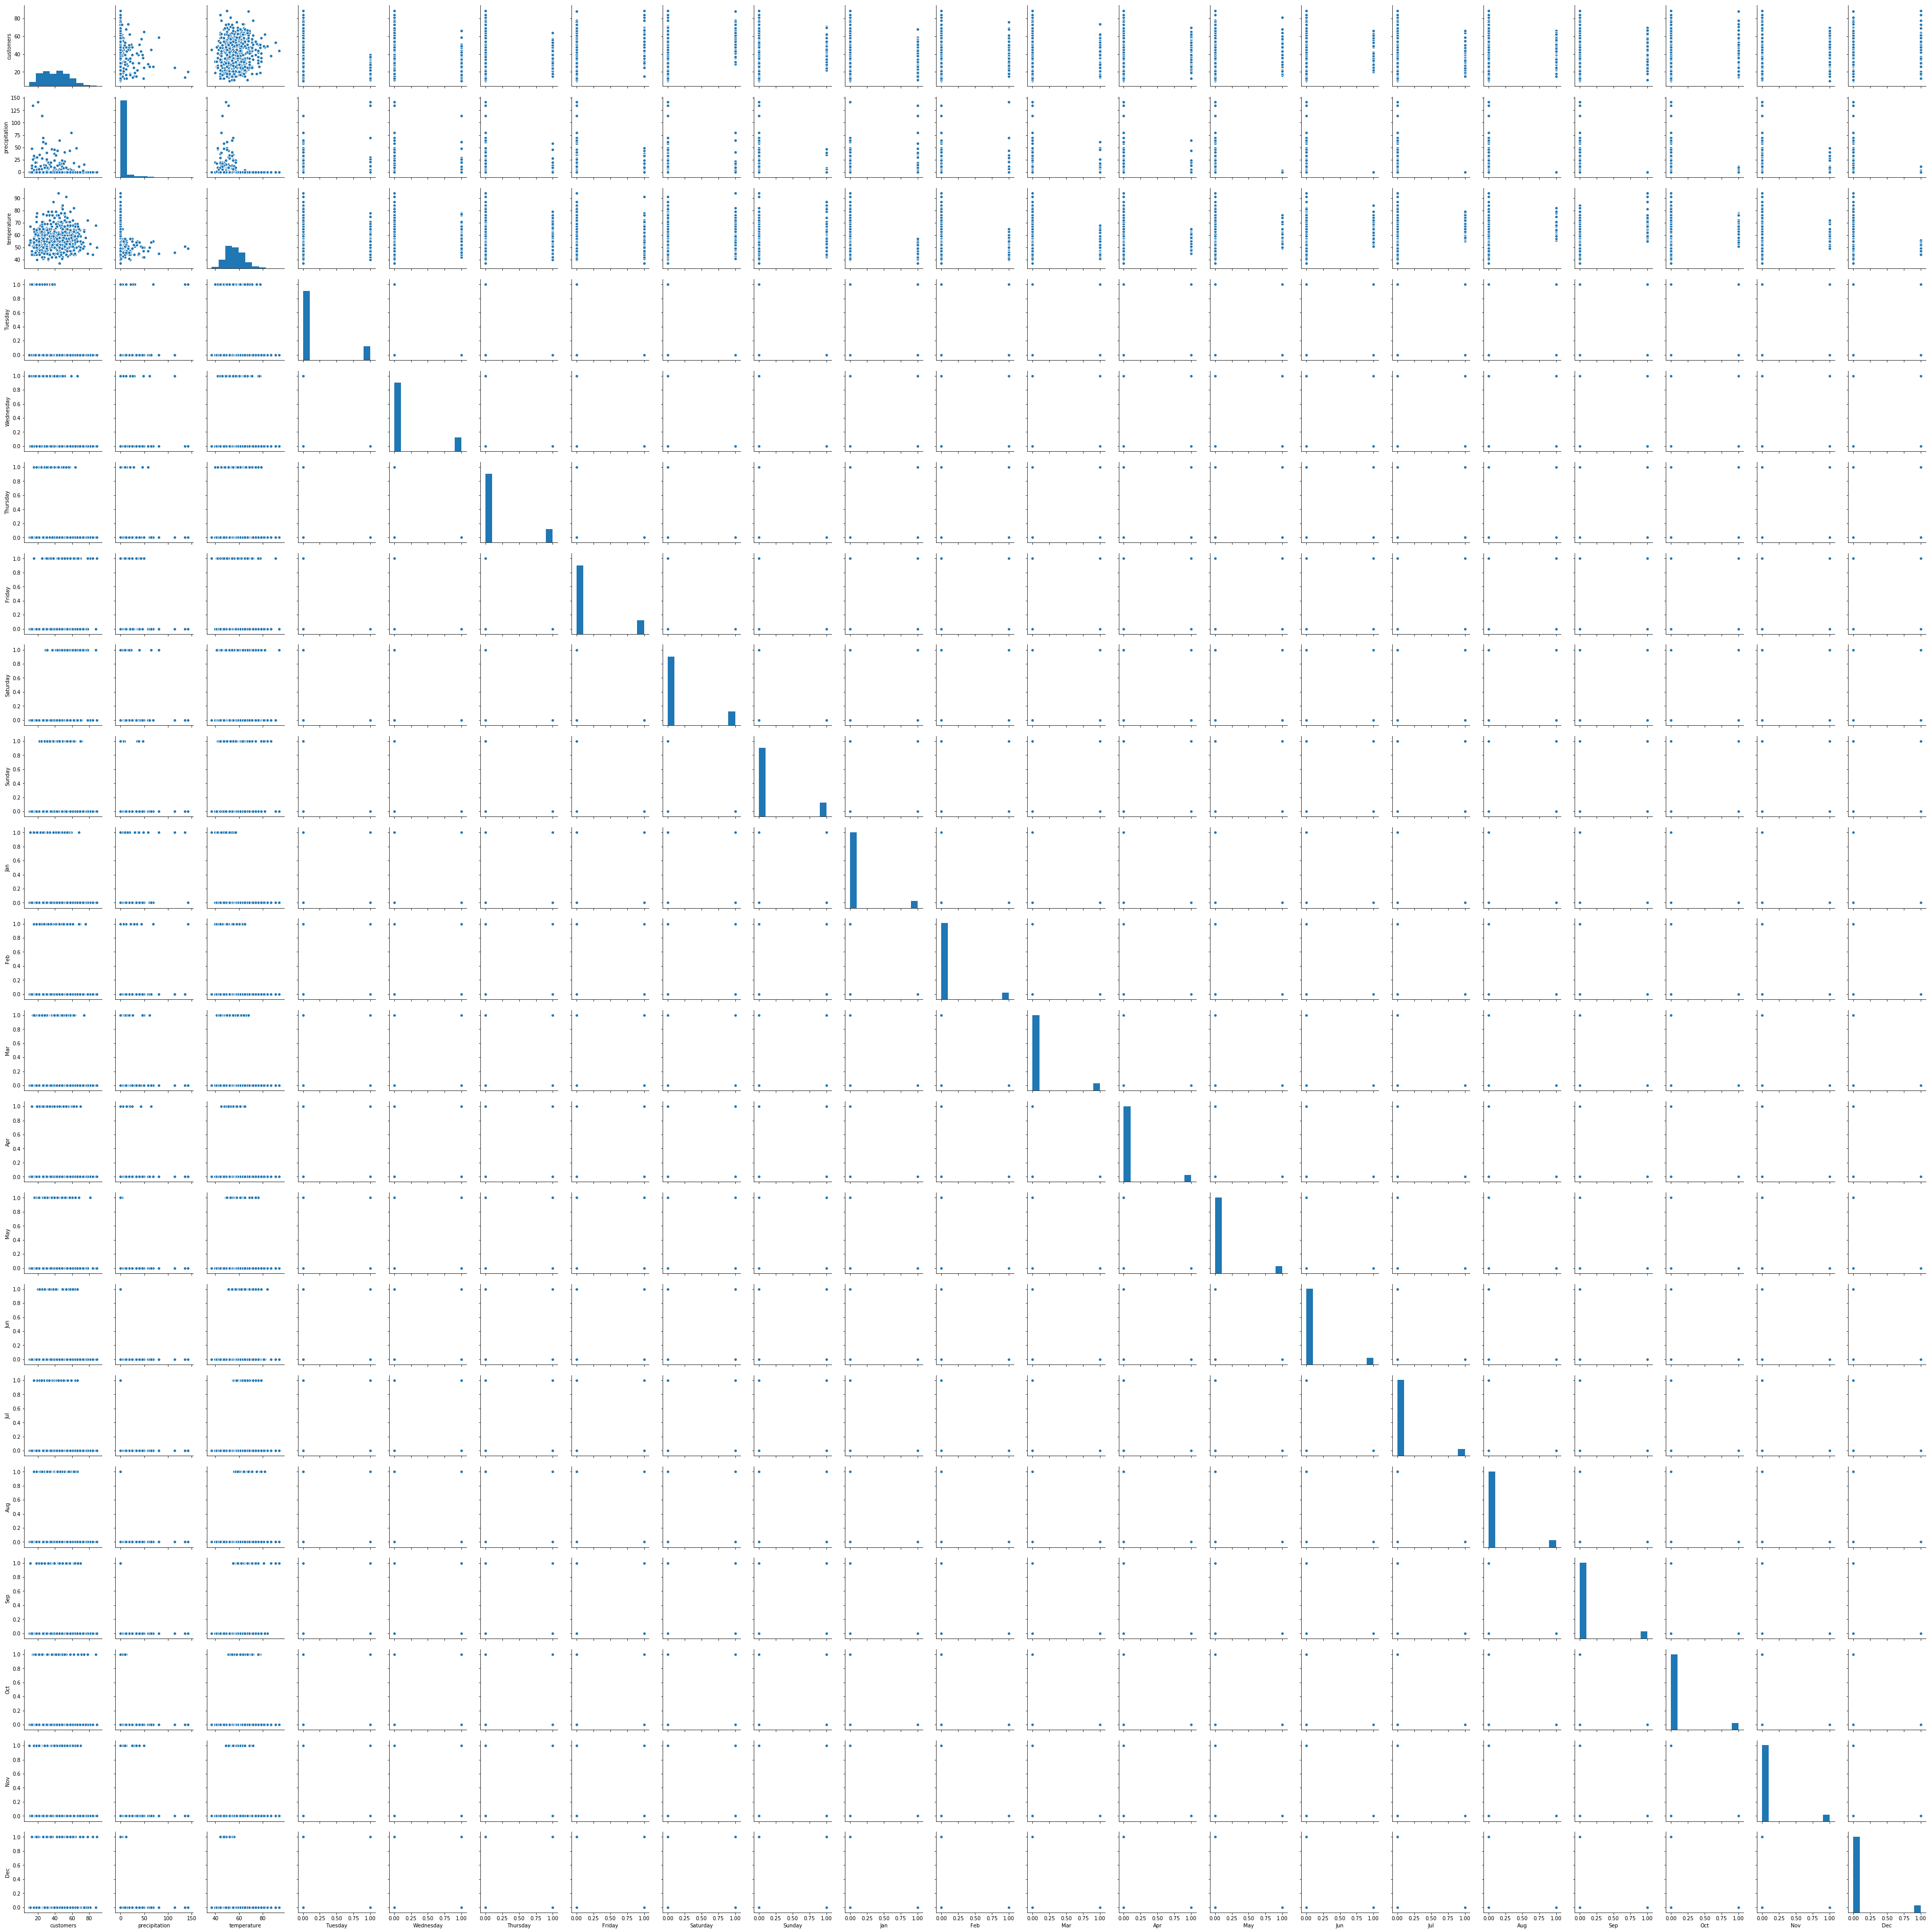

In [12]:
sns.pairplot(df)

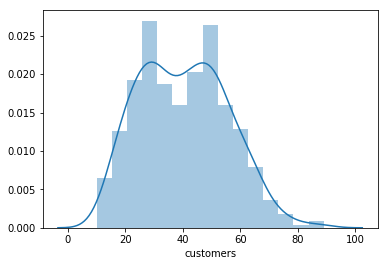

In [13]:
#Trying to predict Number of Customer so, find distribution for the target column(customers)
sns.distplot(df['customers'])

In [14]:
df.corr()

,customers,precipitation,temperature,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Jan,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
customers,1.000000,-0.124436,0.096288,-0.516268,-0.316038,-0.127855,0.310103,0.454488,0.190582,-0.132177,...,-0.034356,-0.006915,-0.014162,0.047893,-0.013447,0.026672,0.010568,0.061985,-0.016184,0.114925
precipitation,-0.124436,1.000000,-0.235558,0.048819,0.003392,-0.000766,0.026152,-0.013008,-0.064217,0.241168,...,0.109532,0.023151,-0.076809,-0.077342,-0.076527,-0.078954,-0.076890,-0.066514,0.027171,-0.068319
temperature,0.096288,-0.235558,1.000000,-0.019390,-0.036141,-0.014208,0.034814,0.040470,-0.005805,-0.329124,...,-0.149558,-0.106077,-0.029257,0.148561,0.231641,0.216985,0.271926,0.214402,-0.036529,-0.246484
Tuesday,-0.516268,0.048819,-0.019390,1.000000,-0.199217,-0.196911,-0.199217,-0.199217,-0.199217,0.025487,...,-0.013637,-0.006180,0.019926,-0.008708,-0.006180,0.001792,-0.008708,0.022681,-0.003608,-0.024403
Wednesday,-0.316038,0.003392,-0.036141,-0.199217,1.000000,-0.199217,-0.201550,-0.201550,-0.201550,0.006994,...,-0.000889,-0.008717,0.017132,-0.011253,-0.008717,0.014420,-0.011253,0.004320,0.009717,-0.011253
Thursday,-0.127855,-0.000766,-0.014208,-0.196911,-0.199217,1.000000,-0.199217,-0.199217,-0.199217,-0.006180,...,0.017220,-0.006180,0.004367,0.006987,-0.006180,0.017220,-0.008708,-0.008708,-0.003608,-0.008708
Friday,0.310103,0.026152,0.034814,-0.199217,-0.201550,-0.199217,1.000000,-0.201550,-0.201550,-0.008717,...,0.014420,-0.008717,-0.013746,0.019893,-0.008717,-0.000889,0.004320,-0.011253,0.009717,0.004320
Saturday,0.454488,-0.013008,0.040470,-0.199217,-0.201550,-0.199217,-0.201550,1.000000,-0.201550,-0.008717,...,-0.000889,0.006994,-0.013746,0.004320,0.006994,-0.016198,0.019893,-0.011253,-0.006137,0.019893
Sunday,0.190582,-0.064217,-0.005805,-0.199217,-0.201550,-0.199217,-0.201550,-0.201550,1.000000,-0.008717,...,-0.016198,0.022705,-0.013746,-0.011253,0.022705,-0.016198,0.004320,0.004320,-0.006137,0.019893
Jan,-0.132177,0.241168,-0.329124,0.025487,0.006994,-0.006180,-0.008717,-0.008717,-0.008717,1.000000,...,-0.092474,-0.089631,-0.091533,-0.090585,-0.089631,-0.092474,-0.090585,-0.090585,-0.088670,-0.090585


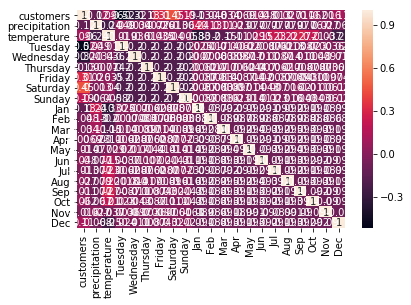

In [15]:
#correlation between columns plotted as heatmap - each colum perfectly correlated with itself = perfect diagonal
#, annot=True
sns.heatmap(df.corr(),annot=True)

In [16]:
X=df[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Sunday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday',  'precipitation',
       'temperature']]

In [17]:
Y=df['customers']

In [18]:
#Training Linear Regression Model
#Split Data: X-arr - features to train on/y-arr - target variable
from sklearn.model_selection import train_test_split

In [19]:
#Tuple unpacking to grab training set and testing set
#test_size = Percentage of data you want allocated to testing data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=101)

In [20]:

from sklearn.linear_model import LinearRegression

In [21]:
#Create a linear regression object/instatniate an instance of linear regression
lm = LinearRegression()

In [22]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
#y=mx + b
print(lm.intercept_)

46.18335449730364


In [24]:
lm.coef_

array([ -6.55540853,  -6.52069639,  -1.67970101,  -0.80706306,
         1.11179976,   3.08900805,  -1.39376374,   3.20170671,
         0.65088046,   3.04512147,   1.28497382,   4.57314248,
         6.29429248, -18.10854416, -12.03872475,  -4.13841443,
        11.41254151,  16.57884935,  -0.03657031,  -0.10408734])

In [25]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
Jan,-6.555409
Feb,-6.520696
Mar,-1.679701
Apr,-0.807063
May,1.111800
Jun,3.089008
Jul,-1.393764
Aug,3.201707
Sep,0.650880
Oct,3.045121


In [26]:
#Predictions - predict method with features that are new to model
#Predictions from test set
predictions = lm.predict(X_test)

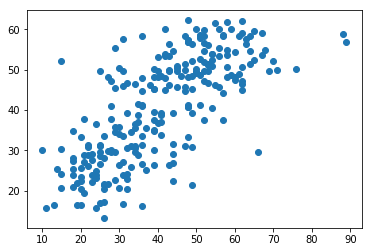

In [27]:
#Prediction accurate = not many customers at 40, 0's gone
plt.scatter(Y_test,predictions)

In [28]:
#y_test contains test results, so we need to find error between predictions and y_test
Y_test

255    25
392    54
129    27
30     20
598    34
612    22
340    36
551    51
650    62
151    49
497    39
424    18
264    65
672    52
621    49
432    30
28     48
268    18
226    18
173    54
514    39
164    22
709    18
370    54
466    29
670    47
216    65
695    18
524    56
126    60
       ..
545    61
501    39
208    45
202    54
112    43
34     58
649    67
328    31
143    34
376    56
383    31
131    56
303    14
528    34
154    40
710    26
223    42
201    47
19     39
150    44
46     29
576    15
387    19
697    28
212    24
108    23
471    19
615    48
577    22
68     52
Name: customers, Length: 248, dtype: int64

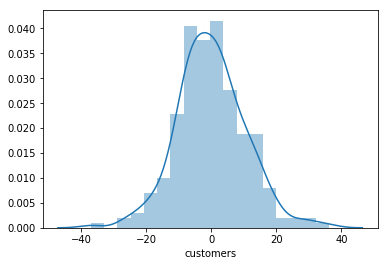

In [29]:
sns.distplot((Y_test-predictions))

In [30]:
#Dictionary for input
Input = [{"Jan":0,"Feb":0,"Mar":1,"Apr":0,"May":0,"Jun":0,"Jul":0,"Aug":0,"Sep":0,"Oct":0,"Nov":0,"Dec":0,
          "Sunday":0,"Tuesday":0,"Wednesday":0,"Thursday":0,"Friday":1,"Saturday":0,
          "precipitation":0,"temperature":55} ]

In [31]:
#Converting input into a dataframe
Inputdf= pd.DataFrame(Input)

In [32]:
#Prediction for Input
p = lm.predict(Inputdf)

In [33]:
print("No. of Customers expected to visit the Salon: %d" % (p))

No. of Customers expected to visit the Salon: 42
